In [1]:
from timeit import default_timer as timer
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl


In [2]:
ds = xr.open_dataset('../subsampleERAinterim.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 33, level: 41, longitude: 94, time: 10)
Coordinates:
  * level      (level) int64 61 60 59 58 57 56 55 54 ... 28 27 26 25 24 23 22 21
  * longitude  (longitude) float32 230.25 231.0 231.75 ... 298.5 299.25 300.0
  * latitude   (latitude) float32 49.5 48.75 48.0 47.25 ... 27.0 26.25 25.5
  * time       (time) datetime64[ns] 2013-05-13T12:00:00 ... 2013-05-15T18:00:00
Data variables:
    t          (level, time, latitude, longitude) float32 ...
    q          (level, time, latitude, longitude) float32 ...
    u          (level, time, latitude, longitude) float32 ...
    v          (level, time, latitude, longitude) float32 ...
    p          (level, time, latitude, longitude) float64 ...
    td         (level, time, latitude, longitude) float64 ...
    H_xr3d     (level, time, latitude, longitude) float64 ...
    AGLH_xr3d  (level, time, latitude, longitude) float64 ...

(array([2.0000e+00, 2.6182e+04, 1.2543e+04, 9.1970e+03, 9.9840e+03,
        1.1714e+04, 1.2709e+04, 3.3564e+04, 3.0412e+04, 8.6710e+03]),
 array([-99.2224501 , -87.13825746, -75.05406482, -62.96987217,
        -50.88567953, -38.80148689, -26.71729425, -14.63310161,
         -2.54890897,   9.53528368,  21.61947632]),
 <a list of 10 Patch objects>)

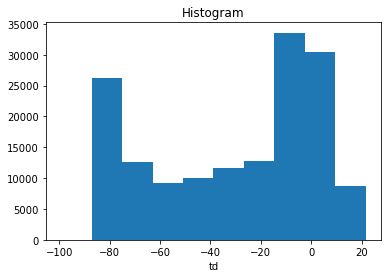

In [11]:
(ds.td).plot()

In [5]:
ds = ds.sel(latitude=slice(40,30),longitude=slice(250,270))

In [6]:
from xcape import core
from importlib import reload
core = reload(core)

In [7]:
from xcape import ALLCAPELOOP
Pflat, Tflat, Tdflat = core._reshape_inputs(ds.p.values, ds.t.values-273.15, ds.td.values)

original_shape = ds.p.values.shape
    
source=1 #'surface', 
ml_depth=500., 
adiabat=1 #'pseudo-liquid',
pinc=1000.
    
BCAPE_SBa, BCIN_SBa, _, _ = ALLCAPELOOP.loopcape(
    Pflat,Tflat,Tdflat,
    pinc, source, ml_depth, adiabat,
    ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])

ca_out,ci_out = core._reshape_outputs(BCAPE_SBa, BCIN_SBa, shape=original_shape)


(41, 3780)


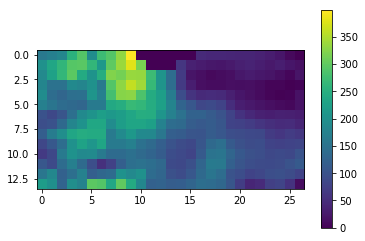

In [8]:
plt.imshow(ca_out[0,5])
plt.colorbar()

In [14]:

ca,ci,mu,zm = core.calc_cape(ds.p.values, ds.t.values-273.15, ds.td.values, 
                             source='mixed-layer', ml_depth=500., adiabat='pseudo-liquid',
                             pinc=1000., method='fortran')

(41, 10, 14, 27)
(41, 3780)
[nan nan nan ... nan nan nan]


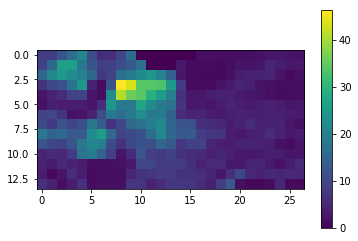

In [15]:
plt.imshow(ca[0,5])
plt.colorbar()

In [12]:
# OLD ROUTINES
# from xcape import SBCAPELOOP, MLCAPELOOP, MLCAPE100LOOP, MUCAPELOOP
    

# start = timer()
# BCAPE_SB, BCIN_SB = SBCAPELOOP.loopcape(ds.p.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.t.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.td.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])
# # print(BCAPE_SB, BCIN_SB)
# BCAPE_ML, BCIN_ML = MLCAPELOOP.loopcape(ds.p.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.t.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.td.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])
# # print(BCAPE_SB, BCIN_SB)
# BCAPE_ML100, BCIN_ML100 = MLCAPE100LOOP.loopcape(ds.p.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.t.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.td.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])
# # print(BCAPE_SB, BCIN_SB)
# BCAPE_MU, BCIN_MU, mulv, zmu = MUCAPELOOP.loopcape(ds.p.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.t.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.td.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
#  ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])
# # print(BCAPE_SB, BCIN_SB)

# end = timer()
# print('loop in fortran ',end-start)


In [13]:
start = timer()
Pflat=    ds.p.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])
Tflat=    ds.t.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])
Tdflat=    ds.td.values.reshape(ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])

pinc=1000.
source=1 # surface
ml_depth=500.
adiabat=1

BCAPE_SBa, BCIN_SBa, _, _ = ALLCAPELOOP.loopcape(
    Pflat,Tflat,Tdflat,
    pinc, source, ml_depth, adiabat,
    ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])

pinc=1000.
source=3 # mixed layer: uses ml_depth
ml_depth=500.
adiabat=1

BCAPE_MLa, BCIN_MLa, _, _ = ALLCAPELOOP.loopcape(
    Pflat,Tflat,Tdflat,
pinc, source, ml_depth, adiabat,
 ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])

pinc=1000.
source=2 # maximum unstable: uses ml_depth
ml_depth=500.
adiabat=1

BCAPE_MUa, BCIN_MUa, Mulev, zMUlev  = ALLCAPELOOP.loopcape(
    Pflat,Tflat,Tdflat,
pinc, source, ml_depth, adiabat,
 ds.level.shape[0],ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])


end = timer()
print('loop ALLLOOP ',end-start)


loop ALLLOOP  722.8084989571944


In [14]:
ds['sbcape'] = (('time','latitude','longitude'), 
                BCAPE_SBa.reshape(ds.time.shape[0],ds.latitude.shape[0],ds.longitude.shape[0]))
ds['mlcape'] = (('time','latitude','longitude'), 
                BCAPE_MLa.reshape(ds.time.shape[0],ds.latitude.shape[0],ds.longitude.shape[0]))
ds['mucape'] = (('time','latitude','longitude'), 
                BCAPE_MUa.reshape(ds.time.shape[0],ds.latitude.shape[0],ds.longitude.shape[0]))


In [15]:


start = timer()

rm_sup,lm_sup,meanwind_6km = Bunkers_loop.bunkers_loop(ds.u.values.reshape(ds.level.shape[0],
                                                                         ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
                                                     ds.v.values.reshape(ds.level.shape[0],
                                                                         ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
                                                     ds.AGLH_xr3d.values.reshape(ds.level.shape[0],
                                                                         ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0])
                                                    )

# levels need to be inverted:
# i.e. - AGLHin = AGLH[::-1,:,:]
srh3kmb = srhBULOOP.dcalrelhl(ds.u.isel(level=slice(None, None, -1)).values.reshape(ds.level.shape[0],
                                                 ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
                             ds.v.isel(level=slice(None, None, -1)).values.reshape(ds.level.shape[0],
                                                 ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
                             ds.AGLH_xr3d.isel(level=slice(None, None, -1)).values.reshape(ds.level.shape[0],
                                                 ds.time.shape[0]*ds.longitude.shape[0]*ds.latitude.shape[0]),
                          rm_sup[0,:],
                          rm_sup[1,:],3000.)
end = timer()
print('loop fortran flat ',end-start)


loop fortran flat  10.58640465606004


In [16]:
ds['srh3kmb'] = (('time','latitude','longitude'), 
                srh3kmb.reshape(ds.time.shape[0],ds.latitude.shape[0],ds.longitude.shape[0]))

TypeError: cape() missing 2 required positional arguments: 'nlev' and 'ngrid'